In [1]:
#已经有了以下文件：
#阿里云数据可视化平台下载行政区划，Mapshaper转换为shap文件
#OSM上下载数据集，需要注意这是在WGS-84坐标系下的

,adcode,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,geometry
0,610102,新城区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((108.95336 34.29266, 108.96711 34.292..."
1,610103,碑林区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((109.00634 34.24273, 108.99647 34.242..."
2,610104,莲湖区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((108.95336 34.29266, 108.9534 34.2895..."
3,610111,灞桥区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((109.03092 34.25128, 109.0298 34.2520..."
4,610112,未央区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((108.9958 34.294, 108.99578 34.29479,..."
5,610113,雁塔区,NaN,NaN,0,district,NaN,5,NaN,"POLYGON ((108.90948 34.23932, 108.92258 34.232..."


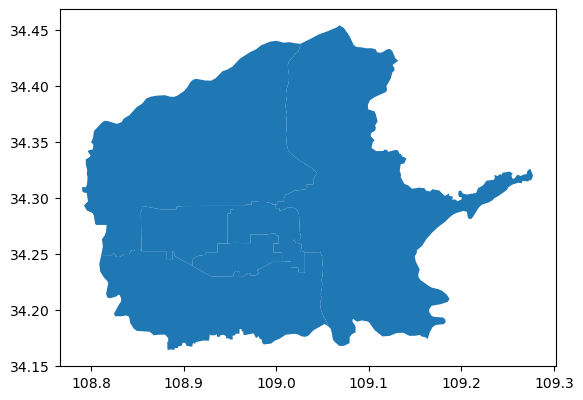

In [2]:
#下载的西安市行政区划数据是在GCJ-02坐标系下的，筛选出西安市城六区行政区划

import geopandas as gpd
import matplotlib.pyplot as plt

# 2. 读取西安市行政区划数据，，GCJ-02坐标系
xian_boundary_path = r"D:\\郭圆圆-硕士毕业论文\\数据\\高德-西安市行政区划-GCJ02\\西安市\\西安市.shp"
gdf_xian = gpd.read_file(xian_boundary_path, encoding='utf-8')
# 定义要筛选的区名列表，这里以示例区名为例，你可以根据实际情况修改
selected_districts = ['雁塔区', '碑林区', '莲湖区', '新城区', '灞桥区', '未央区']
# 筛选城六区
gdf_selected = gdf_xian[gdf_xian['name'].isin(selected_districts)]
gdf_selected.plot()
gdf_selected

转换完成，已转换为 WGS-84 坐标系 shapefile。


,adcode,name,center,centroid,childrenNu,level,parent,subFeature,acroutes,geometry
0,610102,新城区,NaN,NaN,0,district,NaN,0,NaN,"POLYGON ((108.94867 34.29421, 108.96237 34.294..."
1,610103,碑林区,NaN,NaN,0,district,NaN,1,NaN,"POLYGON ((109.00144 34.24415, 108.99161 34.244..."
2,610104,莲湖区,NaN,NaN,0,district,NaN,2,NaN,"POLYGON ((108.94867 34.29421, 108.94871 34.291..."
3,610111,灞桥区,NaN,NaN,0,district,NaN,3,NaN,"POLYGON ((109.02592 34.25263, 109.0248 34.2534..."
4,610112,未央区,NaN,NaN,0,district,NaN,4,NaN,"POLYGON ((108.99094 34.29544, 108.99092 34.296..."
5,610113,雁塔区,NaN,NaN,0,district,NaN,5,NaN,"POLYGON ((108.90488 34.24095, 108.91797 34.234..."


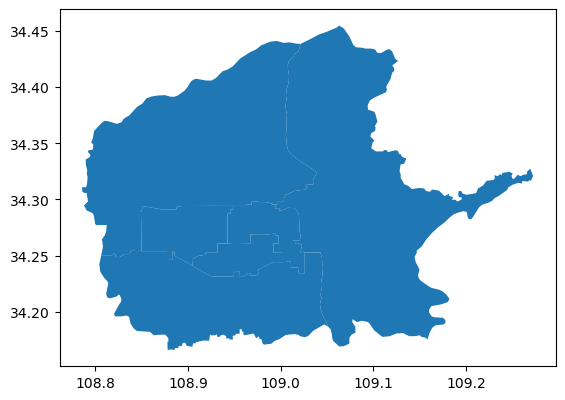

In [3]:
#将 gcj02坐标系下的行政区划转换为wgs84坐标系下
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from transbigdata import gcj02towgs84

# 读取西安市城六区行政区划数据
xian_boundary_path = r"D:\\郭圆圆-硕士毕业论文\\数据\\高德-西安市行政区划-GCJ02\\西安市\\西安市.shp"
gdf_xian = gpd.read_file(xian_boundary_path, encoding='utf-8')

# 筛选城六区
selected_districts = ['雁塔区', '碑林区', '莲湖区', '新城区', '灞桥区', '未央区']
gdf_selected = gdf_xian[gdf_xian['name'].isin(selected_districts)].copy()

# 转换 Polygon 的坐标
def convert_polygon(polygon):
    exterior_coords = [gcj02towgs84(x, y) for x, y in polygon.exterior.coords]
    interiors = []
    for interior in polygon.interiors:
        interior_coords = [gcj02towgs84(x, y) for x, y in interior.coords]
        interiors.append(interior_coords)
    return Polygon(exterior_coords, interiors)

# 转换 MultiPolygon
def convert_multipolygon(multipolygon):
    return MultiPolygon([convert_polygon(p) for p in multipolygon.geoms])

# 应用转换函数
def convert_geometry(geometry):
    if geometry.geom_type == 'Polygon':
        return convert_polygon(geometry)
    elif geometry.geom_type == 'MultiPolygon':
        return convert_multipolygon(geometry)
    else:
        return geometry  # 其他类型保持不变（如 Point）

# 进行坐标转换
gdf_selected['geometry'] = gdf_selected['geometry'].apply(convert_geometry)

# 设置坐标系为 WGS84
gdf_selected.set_crs(epsg=4326, inplace=True)

# 保存结果
#output_path = r"D:\\郭圆圆-硕士毕业论文\\数据\\84-西安市行政区划-城六区\\西安市_城六区_WGS84.shp"
#gdf_selected.to_file(output_path)

print("转换完成，已转换为 WGS-84 坐标系 shapefile。")
gdf_selected.plot()
gdf_selected

In [4]:
#84坐标系下的西安市城六区城市道路
import geopandas as gpd

# 1. 读取OSM下载的陕西省城市道路数据
road_path = r"D:\\郭圆圆-硕士毕业论文\\数据\\shaanxi-latest-free.shp\\gis_osm_roads_free_1.shp"
gdf_roads = gpd.read_file(road_path)

# 2. 读取之前转换为WGS-84的西安市城六区行政区划数据
#district_path = r"D:\A郭圆圆-硕士毕业论文\西安22年OBD数据\转换后数据\西安市_城六区_WGS84.shp"
gdf_districts = gdf_selected.copy()

# 3. 确保两者坐标系一致（WGS-84）
gdf_roads = gdf_roads.to_crs(epsg=4326)
gdf_districts = gdf_districts.to_crs(epsg=4326)

# 4. 使用 gpd.overlay 函数进行空间交集，保留道路与城六区交集部分
gdf_roads_clip = gpd.overlay(gdf_roads, gdf_districts, how='intersection')


# 指定要筛选的快速路、主干路、次干路、支路
selected_values = ['trunk','primary', 'secondary', 'tertiary']
# 筛选城六区城市道路
gdf_roads_clip = gdf_roads_clip[gdf_roads_clip['fclass'].isin(selected_values)]


gdf_roads_clip = gdf_roads_clip[['osm_id','code', 'fclass','name_1','ref', 'oneway','maxspeed','layer', 'bridge','tunnel', 'geometry']]



# 5. 保存结果
#output_path = r"D:\\郭圆圆-硕士毕业论文\\数据\\西安市城六区城市道路-84\\西安市城六区城市道路-84.shp"
#gdf_roads_clip.to_file(output_path)

print("已成功筛选出西安市城六区的道路数据。")
gdf_roads_clip

已成功筛选出西安市城六区的道路数据。


,osm_id,code,fclass,name_1,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
2,26174007,5113,primary,西影路,None,F,0,0,F,F,"LINESTRING (108.96131 34.22459, 108.96109 34.2..."
3,26174011,5114,secondary,雁塔北路,None,F,0,0,F,F,"LINESTRING (108.9594 34.23183, 108.95931 34.23..."
4,26327101,5113,primary,太白南路,None,F,70,0,F,F,"LINESTRING (108.89129 34.20022, 108.89138 34.2..."
5,28257274,5113,primary,丈八东路,None,F,0,0,F,F,"LINESTRING (108.94118 34.19973, 108.93948 34.1..."
6,28257572,5115,tertiary,科技七路,None,B,0,0,F,F,"LINESTRING (108.88347 34.20937, 108.88327 34.2..."
...,...,...,...,...,...,...,...,...,...,...,...
21847,1348440253,5115,tertiary,None,None,F,0,0,F,F,"LINESTRING (109.02717 34.25495, 109.02783 34.2..."
21849,1348440255,5115,tertiary,None,None,B,0,0,F,F,"LINESTRING (109.02783 34.25494, 109.02783 34.2..."
21851,1348443782,5115,tertiary,None,None,B,0,0,F,F,"LINESTRING (109.02473 34.25789, 109.02469 34.2..."
21945,1354144943,5114,secondary,None,None,F,0,0,F,F,"LINESTRING (108.94268 34.19969, 108.94118 34.1..."


<Axes: >

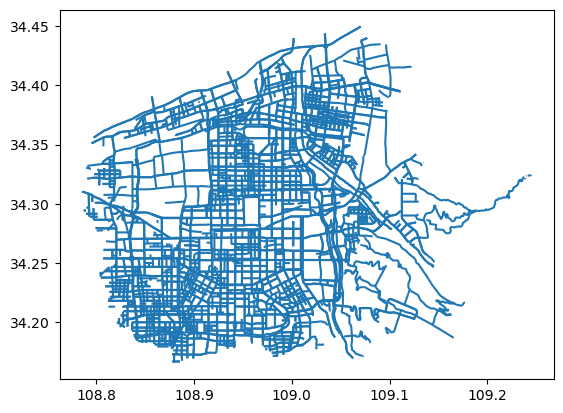

In [5]:
gdf_roads_clip.plot()

In [6]:
#将城市道路划分为50m路段，给一个路段ID

import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import LineString

# 1. 读取道路shapefile（请替换成你的实际路径）
roads = gpd.read_file("D:\\郭圆圆-硕士毕业论文\\数据\\西安市城六区城市道路-84\\西安市城六区城市道路-84.shp")  # 或者 CSV+WKT 转 GeoDataFrame

roads = roads.to_crs(epsg=32650)  # 投影为米单位（UTM 50N 适用于西安）

# 2. 切分函数：从起点开始，每隔max_length切分，并保留最后尾段
def split_line_keep_tail(row, max_length=50):
    line = row.geometry
    length = line.length
    if length <= max_length:
        new_row = row.copy()
        new_row["meters"] = length  # 添加长度字段
        return [new_row]
    
    # 插值点：从起点到终点
    points = [line.interpolate(d) for d in np.arange(0, length, max_length)]
    points.append(line.interpolate(length))  # 添加终点，确保完整

    # 构建新线段 + 保留属性 + 长度
    segments = []
    for i in range(len(points) - 1):
        new_geom = LineString([points[i], points[i + 1]])
        new_row = row.copy()
        new_row.geometry = new_geom
        new_row["meters"] = new_geom.length  # 实际段长（可能尾段<50m）
        segments.append(new_row)
    return segments

# 3. 对所有道路进行切分
split_segments = []
for idx, row in roads.iterrows():
    split_segments.extend(split_line_keep_tail(row, max_length=50))

# 4. 转为新的 GeoDataFrame
split_gdf = gpd.GeoDataFrame(split_segments, crs=roads.crs)

# 5. 添加唯一的 segment_id
split_gdf = split_gdf.reset_index(drop=True)
split_gdf["segment_id"] = split_gdf.index + 1

# 6. 保留字段
columns_to_keep = ["segment_id", "fclass", "oneway", "layer", "bridge", "tunnel", "meters", "geometry"]
split_gdf = split_gdf[columns_to_keep]
split_gdf_wgs84 = split_gdf.to_crs(epsg=4326)

# 7. 保存结果（.shp 或 .gpkg）
#split_gdf_wgs84.to_file("D:\\郭圆圆-硕士毕业论文\\数据\\西安市城六区城市道路-84-50m路段\\split_road_segments_50m_with_length.shp")

print(f"✅ 切分完成，共生成 {len(split_gdf)} 段，每段包含真实长度 meters 字段。")
split_gdf_wgs84

✅ 切分完成，共生成 80363 段，每段包含真实长度 meters 字段。


,segment_id,fclass,oneway,layer,bridge,tunnel,meters,geometry
0,1,primary,F,0,F,F,49.853630,"LINESTRING (108.96131 34.22459, 108.9608 34.22..."
1,2,primary,F,0,F,F,49.993679,"LINESTRING (108.9608 34.22444, 108.96027 34.22..."
2,3,primary,F,0,F,F,49.962644,"LINESTRING (108.96027 34.22438, 108.95973 34.2..."
3,4,primary,F,0,F,F,49.999636,"LINESTRING (108.95973 34.22436, 108.95919 34.2..."
4,5,primary,F,0,F,F,24.899315,"LINESTRING (108.95919 34.22435, 108.95892 34.2..."
...,...,...,...,...,...,...,...,...
80358,80359,secondary,F,0,F,F,39.223843,"LINESTRING (108.9416 34.19972, 108.94118 34.19..."
80359,80360,secondary,F,0,F,F,50.000000,"LINESTRING (108.94113 34.19961, 108.94167 34.1..."
80360,80361,secondary,F,0,F,F,50.000000,"LINESTRING (108.94167 34.1996, 108.9422 34.19959)"
80361,80362,secondary,F,0,F,F,49.999077,"LINESTRING (108.9422 34.19959, 108.94274 34.19..."
